In [1]:
import sympy as sp
from sympy.physics import mechanics
import script as rt
from IPython import display
from IPython.lib.display import IFrame
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
t = sp.symbols('t')
mechanics.init_vprinting()  # за да скрати печатењето на (t) кај променливите кои зависат од времето

# 4.2

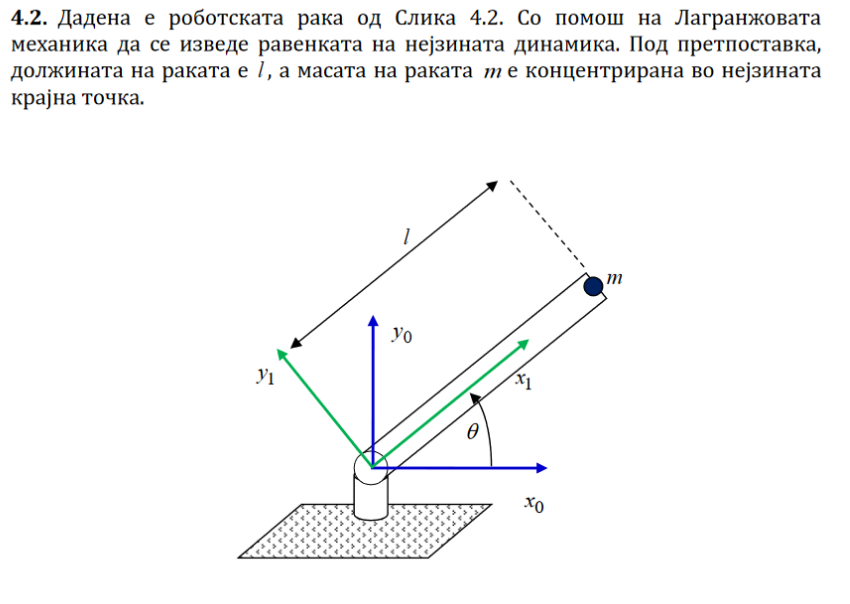

In [13]:
display.Image('images/4.2.png', width=700)

In [14]:
theta1, theta2, l = sp.symbols('theta1, theta2, l')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,0,l,0)
robot.add_subs([(l, 1)])
robot.interact()

In [15]:
robot.get_dh_matrix()

⎡cos(θ₁)  -sin(θ₁)  0  l⋅cos(θ₁)⎤
⎢                               ⎥
⎢sin(θ₁)  cos(θ₁)   0  l⋅sin(θ₁)⎥
⎢                               ⎥
⎢   0        0      1      0    ⎥
⎢                               ⎥
⎣   0        0      0      1    ⎦

In [23]:
m, g, l = sp.symbols('m, g, l')
theta1= mechanics.dynamicsymbols('theta1')

In [24]:
x= l* sp.cos(theta1)
x

l⋅cos(θ₁)

In [25]:
y = l*sp.sin(theta1)
y

l⋅sin(θ₁)

In [26]:
vx = x.diff(t)
vx

-l⋅sin(θ₁)⋅θ₁̇

In [27]:
vy = y.diff(t)
vy

l⋅cos(θ₁)⋅θ₁̇

In [34]:
v2=vx**2+vy**2
v2= v2.simplify()
v2

 2   2
l ⋅θ₁̇ 

In [35]:
K= m*v2/2
K

 2     2
l ⋅m⋅θ₁̇ 
────────
   2    

In [36]:
P=m*g*l*sp.sin(theta1)
P

g⋅l⋅m⋅sin(θ₁)

In [37]:
L=K-P
L

                  2     2
                 l ⋅m⋅θ₁̇ 
-g⋅l⋅m⋅sin(θ₁) + ────────
                    2    

In [38]:
rt.lagrangian(L, [theta1])

[l⋅m⋅(g⋅cos(θ₁) + l⋅θ₁̈)]

In [39]:
rt.dynamic_model_with_4_matrices(L, [theta1])

⎛⎡ 2     ⎤                          ⎞
⎝⎣l ⋅m⋅θ₁̈⎦, [0], [], [g⋅l⋅m⋅cos(θ₁)]⎠

# 4.3

In [3]:
d1, d2 = sp.symbols('d1, d2')
robot = rt.SerialLinkRobot()
robot.add_prismatic_joint(0,d1,0,-sp.pi/2)
robot.add_prismatic_joint(0,d2,0,0)
robot.interact()

In [54]:
robot.get_dh_matrix()

⎡1  0   0  0 ⎤
⎢            ⎥
⎢0  0   1  d₂⎥
⎢            ⎥
⎢0  -1  0  d₁⎥
⎢            ⎥
⎣0  0   0  1 ⎦

In [42]:
m1, m2, g = sp.symbols('m1, m2, g')
d1, d2= mechanics.dynamicsymbols('d1, d2')

In [43]:
vd1=d1.diff()
vd2=d2.diff()
vd2

d₂̇

In [44]:
K1= m1*vd1**2/2
K1

     2
m₁⋅d₁̇ 
──────
  2   

In [46]:
K2=m2*(vd2**2+vd1**2)/2
K2

   ⎛  2     2⎞
m₂⋅⎝d₁̇  + d₂̇ ⎠
──────────────
      2       

In [47]:
K= K1 + K2
K

     2      ⎛  2     2⎞
m₁⋅d₁̇    m₂⋅⎝d₁̇  + d₂̇ ⎠
────── + ──────────────
  2            2       

In [48]:
P= m1*g*d1 + m2*g*d1
P

g⋅m₁⋅d₁ + g⋅m₂⋅d₁

In [49]:
L = K - P
L

                          2      ⎛  2     2⎞
                     m₁⋅d₁̇    m₂⋅⎝d₁̇  + d₂̇ ⎠
-g⋅m₁⋅d₁ - g⋅m₂⋅d₁ + ────── + ──────────────
                       2            2       

In [50]:
rt.lagrangian(L, [d1, d2])

⎡g⋅m₁ + g⋅m₂ + m₁⋅d₁̈ + m₂⋅d₁̈⎤
⎢                           ⎥
⎣           m₂⋅d₂̈           ⎦

In [51]:
rt.dynamic_model_with_4_matrices(L, [d1, d2])

⎛⎡(m₁ + m₂)⋅d₁̈    0  ⎤  ⎡0  0⎤  ⎡0⎤  ⎡g⋅(m₁ + m₂)⎤⎞
⎜⎢                   ⎥, ⎢    ⎥, ⎢ ⎥, ⎢           ⎥⎟
⎝⎣     0        m₂⋅d₂̈⎦  ⎣0  0⎦  ⎣0⎦  ⎣     0     ⎦⎠

# 4.4

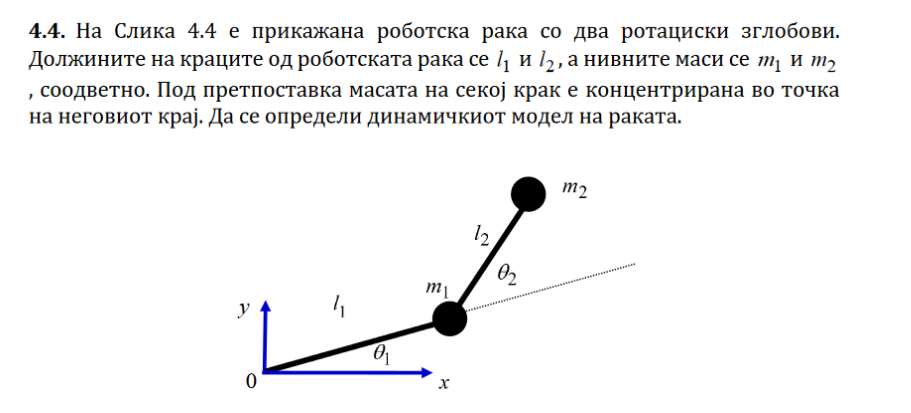

In [52]:
display.Image('images/4.4.png', width=700)

In [55]:
theta1, theta2, l1, l2 = sp.symbols('theta1, theta2, l1, l2')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,0,l1,0)
robot.add_revolute_joint(theta2,0,l2,0)
robot.add_subs([(l1,1),(l2,1)])
robot.interact()

In [56]:
robot.get_dh_matrix()

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                                                            ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎥
⎢                                                            ⎥
⎢     0              0        1               0              ⎥
⎢                                                            ⎥
⎣     0              0        0               1              ⎦

In [57]:
m1, m2, g, l1, l2 = sp.symbols('m1, m2, g, l1, l2')
theta1, theta2= mechanics.dynamicsymbols('theta1, theta2')

In [58]:
x= l1*sp.cos(theta1)+l2*sp.cos(theta1+theta2)
y= l1*sp.sin(theta1)+l2*sp.sin(theta1+theta2)

In [64]:
vx=x.diff(t)
vx = vx.simplify()
vx

-l₁⋅sin(θ₁)⋅θ₁̇ - l₂⋅(θ₁̇ + θ₂̇)⋅sin(θ₁ + θ₂)

In [65]:
vy=y.diff(t)
vy = vy.simplify()
vy

l₁⋅cos(θ₁)⋅θ₁̇ + l₂⋅(θ₁̇ + θ₂̇)⋅cos(θ₁ + θ₂)

In [68]:
v2= vx**2+vy**2
v2 = v.simplify()
v2

  2   2                     2                             2   2       2       
l₁ ⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + l₂ ⋅θ₁̇  + 2⋅l₂ ⋅θ

    2   2
₁̇⋅θ₂̇ + l₂ ⋅θ₂̇ 

In [72]:
x1=l1*sp.cos(theta1)
y1=l1*sp.sin(theta1)
vx1=x1.diff(t)
vy1=y1.diff(t)
v12=vx1**2+vy1**2
v12=v12.simplify()
v12

  2   2
l₁ ⋅θ₁̇ 

In [73]:
K= m1*v12/2 + m2*v2/2
K

  2      2      ⎛  2   2                     2                             2  
l₁ ⋅m₁⋅θ₁̇    m₂⋅⎝l₁ ⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + 
────────── + ─────────────────────────────────────────────────────────────────
    2                                                     2                   

 2       2           2   2⎞
l₂ ⋅θ₁̇  + 2⋅l₂ ⋅θ₁̇⋅θ₂̇ + l₂ ⋅θ₂̇ ⎠
───────────────────────────
                           

In [74]:
P= m1*g*l1*sp.sin(theta1) + m2*g*l1*sp.sin(theta1)+m2*g*l2*sp.sin(theta1+theta2)
P

g⋅l₁⋅m₁⋅sin(θ₁) + g⋅l₁⋅m₂⋅sin(θ₁) + g⋅l₂⋅m₂⋅sin(θ₁ + θ₂)

In [75]:
L= K - P
L

                                                              2      2      ⎛ 
                                                            l₁ ⋅m₁⋅θ₁̇    m₂⋅⎝
-g⋅l₁⋅m₁⋅sin(θ₁) - g⋅l₁⋅m₂⋅sin(θ₁) - g⋅l₂⋅m₂⋅sin(θ₁ + θ₂) + ────────── + ─────
                                                                2             

 2   2                     2                             2   2       2        
l₁ ⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + l₂ ⋅θ₁̇  + 2⋅l₂ ⋅θ
──────────────────────────────────────────────────────────────────────────────
                                        2                                     

   2   2⎞
₁̇⋅θ₂̇ + l₂ ⋅θ₂̇ ⎠
─────────
         

In [76]:
rt.lagrangian(L, [theta1, theta2])

⎡                                                             2            ⎛  
⎢g⋅l₁⋅m₁⋅cos(θ₁) + g⋅l₁⋅m₂⋅cos(θ₁) + g⋅l₂⋅m₂⋅cos(θ₁ + θ₂) + l₁ ⋅m₁⋅θ₁̈ + m₂⋅⎝l
⎢                                                                             
⎢                                                              ⎛              
⎣                                                        l₂⋅m₂⋅⎝g⋅cos(θ₁ + θ₂)

2                                              2                              
₁ ⋅θ₁̈ - 2⋅l₁⋅l₂⋅sin(θ₂)⋅θ₁̇⋅θ₂̇ - l₁⋅l₂⋅sin(θ₂)⋅θ₂̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̈ + 
                                                                              
                2                                ⎞                            
 + l₁⋅sin(θ₂)⋅θ₁̇  + l₁⋅cos(θ₂)⋅θ₁̈ + l₂⋅θ₁̈ + l₂⋅θ₂̈⎠                        

               2        2   ⎞⎤
l₁⋅l₂⋅cos(θ₂)⋅θ₂̈ + l₂ ⋅θ₁̈ + l₂ ⋅θ₂̈⎠⎥
                             ⎥
                             ⎥
                                 ⎦

In [78]:
rt.dynamic_model_with_4_matrices(L, [theta1, theta2])

⎛⎡⎛  2        2                             2   ⎞                             
⎜⎢⎝l₁ ⋅m₁ + l₁ ⋅m₂ + 2⋅l₁⋅l₂⋅m₂⋅cos(θ₂) + l₂ ⋅m₂⎠⋅θ₁̈  l₂⋅m₂⋅(l₁⋅cos(θ₂) + l₂)
⎜⎢                                                                            
⎜⎢                                                              2             
⎝⎣            l₂⋅m₂⋅(l₁⋅cos(θ₂) + l₂)⋅θ₁̈                      l₂ ⋅m₂⋅θ₂̈     

  ⎤  ⎡                                          2⎤                            
⋅θ₂̈⎥  ⎢         0            -l₁⋅l₂⋅m₂⋅sin(θ₂)⋅θ₂̇ ⎥  ⎡-2⋅l₁⋅l₂⋅m₂⋅sin(θ₂)⋅θ₁
  ⎥, ⎢                                           ⎥, ⎢                         
  ⎥  ⎢                   2                       ⎥  ⎣            0            
    ⎦  ⎣l₁⋅l₂⋅m₂⋅sin(θ₂)⋅θ₁̇             0          ⎦                         

                                                           ⎞
̇⋅θ₂̇⎤  ⎡g⋅(l₁⋅m₁⋅cos(θ₁) + l₁⋅m₂⋅cos(θ₁) + l₂⋅m₂⋅cos(θ₁ + θ₂))⎤⎟
⎥, ⎢                                                      ⎥⎟
⎦  ⎣                

In [79]:
gravity_vector = sp.Matrix([
    g * (m1 + m2) * l1 * sp.cos(theta1) + m2 * g * l1 * sp.cos(theta1 + theta2), 
    m2 * g * l1 * sp.cos(theta1 + theta2)])
gravity_vector

⎡g⋅l₁⋅m₂⋅cos(θ₁ + θ₂) + g⋅l₁⋅(m₁ + m₂)⋅cos(θ₁)⎤
⎢                                             ⎥
⎣            g⋅l₁⋅m₂⋅cos(θ₁ + θ₂)             ⎦

In [80]:
t = sp.symbols('t')
gravity_vector = gravity_vector.subs(l1, 2).subs(l2, 1).subs(m1, 5).subs(m2, 3)
gravity_vector = gravity_vector.subs(theta1, 4*sp.sin(t)).subs(theta2, 4*sp.sin(0.5*t)).subs(g, 9.81)
gravity_vector

⎡58.86⋅cos(4⋅sin(0.5⋅t) + 4⋅sin(t)) + 156.96⋅cos(4⋅sin(t))⎤
⎢                                                         ⎥
⎣           58.86⋅cos(4⋅sin(0.5⋅t) + 4⋅sin(t))            ⎦

# 4.6

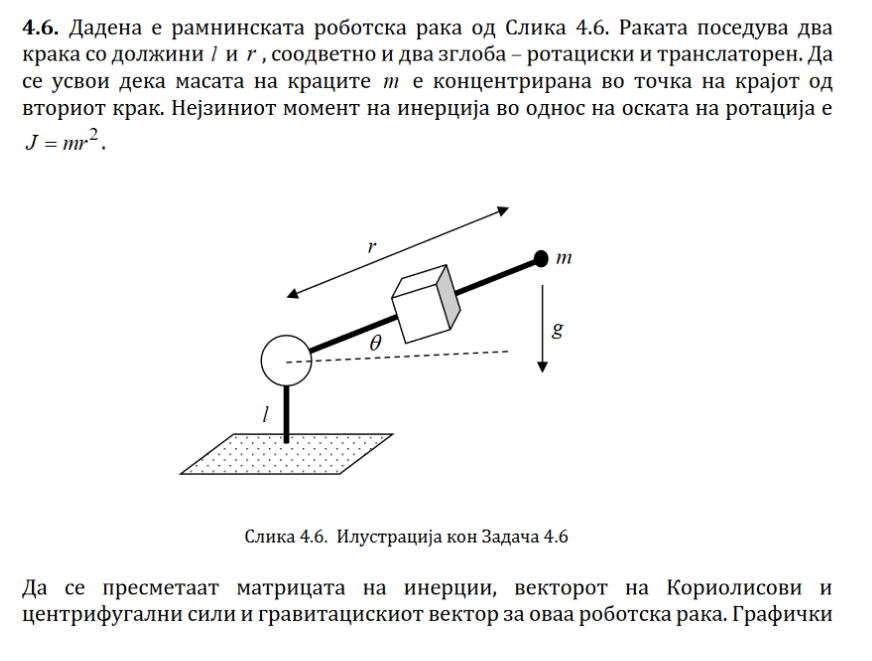

In [81]:
display.Image('images/4.6.png', width=700)

In [82]:
theta, r = sp.symbols('theta, r')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,0,0,sp.pi/2)
robot.add_prismatic_joint(0,r,0,0)
robot.add_subs([(l1,1),(l2,1)])
robot.interact()

In [83]:
robot.get_dh_matrix()

⎡cos(θ₁)  0  sin(θ₁)   r⋅sin(θ₁) ⎤
⎢                                ⎥
⎢sin(θ₁)  0  -cos(θ₁)  -r⋅cos(θ₁)⎥
⎢                                ⎥
⎢   0     1     0          0     ⎥
⎢                                ⎥
⎣   0     0     0          1     ⎦

In [84]:
m, g = sp.symbols('m, g')
theta, r= mechanics.dynamicsymbols('theta, r')

In [85]:
x= r* sp.cos(theta)
y =r* sp.sin(theta)

In [86]:
vx=x.diff(t)
vx

-r⋅sin(θ)⋅θ̇ + cos(θ)⋅ṙ

In [87]:
vy=y.diff(t)
vy

r⋅cos(θ)⋅θ̇ + sin(θ)⋅ṙ

In [89]:
v2= vx**2+vy**2
v2=v2.simplify()
v2

 2  2    2
r ⋅θ̇  + ṙ 

In [90]:
K=m*v2/2
K

  ⎛ 2  2    2⎞
m⋅⎝r ⋅θ̇  + ṙ ⎠
──────────────
      2       

In [91]:
P= m*g*r*sp.sin(theta)
P

g⋅m⋅r⋅sin(θ)

In [92]:
L=K-P
L

                  ⎛ 2  2    2⎞
                m⋅⎝r ⋅θ̇  + ṙ ⎠
-g⋅m⋅r⋅sin(θ) + ──────────────
                      2       

In [93]:
rt.lagrangian(L, [theta, r])

⎡m⋅(g⋅cos(θ) + r⋅θ̈ + 2⋅ṙ⋅θ̇)⋅r⎤
⎢                            ⎥
⎢    ⎛              2    ⎞   ⎥
⎣  m⋅⎝g⋅sin(θ) - r⋅θ̇  + r̈⎠   ⎦

In [94]:
rt.dynamic_model_with_4_matrices(L, [theta, r])

⎛⎡   2       ⎤  ⎡   0     0⎤                             ⎞
⎜⎢m⋅r ⋅θ̈   0 ⎥  ⎢          ⎥  ⎡2⋅m⋅r⋅ṙ⋅θ̇⎤  ⎡g⋅m⋅r⋅cos(θ)⎤⎟
⎜⎢           ⎥, ⎢      2   ⎥, ⎢         ⎥, ⎢            ⎥⎟
⎝⎣  0     m⋅r̈⎦  ⎣-m⋅r⋅θ̇   0⎦  ⎣    0    ⎦  ⎣ g⋅m⋅sin(θ) ⎦⎠

In [97]:
gravity = sp.Matrix([m*g*r*sp.cos(theta), m*g*sp.sin(theta)])
gravity

⎡g⋅m⋅r⋅cos(θ)⎤
⎢            ⎥
⎣ g⋅m⋅sin(θ) ⎦

# 4.9

In [100]:
d1, d2, d3 = sp.symbols('d1, d2, d3')
robot = rt.SerialLinkRobot()
robot.add_prismatic_joint(0,d1,0,-sp.pi/2)
robot.add_prismatic_joint(-sp.pi/2,d2,0,-sp.pi/2)
robot.add_prismatic_joint(0,d3,0,0)
robot.interact()

In [101]:
robot.get_dh_matrix()

⎡0  0   1  d₃⎤
⎢            ⎥
⎢0  -1  0  d₂⎥
⎢            ⎥
⎢1  0   0  d₁⎥
⎢            ⎥
⎣0  0   0  1 ⎦

In [102]:
m1, m2, m3, g = sp.symbols('m1, m2, m3, g')
d1, d2, d3= mechanics.dynamicsymbols('d1, d2, d3')

In [103]:
v12=d1.diff(t)**2
v12

  2
d₁̇ 

In [104]:
v22=v12+ d2.diff(t)**2
v22

  2     2
d₁̇  + d₂̇ 

In [106]:
v32=v22+d3.diff(t)**2
v32

  2     2     2
d₁̇  + d₂̇  + d₃̇ 

In [107]:
K=m1*v12/2+m2*v22/2+m3*v32/2
K

     2      ⎛  2     2⎞      ⎛  2     2     2⎞
m₁⋅d₁̇    m₂⋅⎝d₁̇  + d₂̇ ⎠   m₃⋅⎝d₁̇  + d₂̇  + d₃̇ ⎠
────── + ────────────── + ────────────────────
  2            2                   2          

In [108]:
P=(m1+m2+m3)*g*d1
P

g⋅(m₁ + m₂ + m₃)⋅d₁

In [110]:
L= K - P
L

                            2      ⎛  2     2⎞      ⎛  2     2     2⎞
                       m₁⋅d₁̇    m₂⋅⎝d₁̇  + d₂̇ ⎠   m₃⋅⎝d₁̇  + d₂̇  + d₃̇ ⎠
-g⋅(m₁ + m₂ + m₃)⋅d₁ + ────── + ────────────── + ────────────────────
                         2            2                   2          

In [111]:
rt.lagrangian(L, [d1, d2, d3])

⎡g⋅(m₁ + m₂ + m₃) + m₁⋅d₁̈ + m₂⋅d₁̈ + m₃⋅d₁̈⎤
⎢                                        ⎥
⎢              (m₂ + m₃)⋅d₂̈              ⎥
⎢                                        ⎥
⎣                 m₃⋅d₃̈                  ⎦

In [112]:
rt.dynamic_model_with_4_matrices(L, [d1, d2, d3])

⎛⎡(m₁ + m₂ + m₃)⋅d₁̈       0          0  ⎤  ⎡0  0  0⎤  ⎡0  0  0⎤  ⎡g⋅(m₁ + m₂ 
⎜⎢                                      ⎥  ⎢       ⎥  ⎢       ⎥  ⎢            
⎜⎢        0          (m₂ + m₃)⋅d₂̈    0  ⎥, ⎢0  0  0⎥, ⎢0  0  0⎥, ⎢       0   
⎜⎢                                      ⎥  ⎢       ⎥  ⎢       ⎥  ⎢            
⎝⎣        0               0        m₃⋅d₃̈⎦  ⎣0  0  0⎦  ⎣0  0  0⎦  ⎣       0   

+ m₃)⎤⎞
    ⎥⎟
     ⎥⎟
    ⎥⎟
     ⎦⎠

# 4.11

In [113]:
theta1, theta2, l1, l2 = sp.symbols('theta1, theta2, l1, l2')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,0,l1,0)
robot.add_revolute_joint(theta2,0,l2,0)
robot.add_subs([(l1,1),(l2,1)])
robot.interact()

In [114]:
robot.get_dh_matrix()

⎡cos(θ₁ + θ₂)  -sin(θ₁ + θ₂)  0  l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)⎤
⎢                                                            ⎥
⎢sin(θ₁ + θ₂)  cos(θ₁ + θ₂)   0  l₁⋅sin(θ₁) + l₂⋅sin(θ₁ + θ₂)⎥
⎢                                                            ⎥
⎢     0              0        1               0              ⎥
⎢                                                            ⎥
⎣     0              0        0               1              ⎦

In [133]:
m1, m2, g, l1, l2, l1c, l2c, I1, I2 = sp.symbols('m1, m2, g, l1, l2, l_c1, l_c2, I1, I2')
theta1, theta2= mechanics.dynamicsymbols('theta1, theta2')

In [134]:
x1=l1c*sp.cos(theta1)
y1=l1c*sp.sin(theta1)
v12=x1.diff(t)**2+y1.diff(t)**2
v12 = v12.simplify()
v12

    2   2
l_c1 ⋅θ₁̇ 

In [135]:
x2=l1*sp.cos(theta1)+l2c*sp.cos(theta2+theta1)
y2=l1*sp.sin(theta1)+l2c*sp.sin(theta2+theta1)
v22= x2.diff(t)**2+y2.diff(t)**2
v22 = v22.simplify()
v22

  2   2                       2                                 2   2         
l₁ ⋅θ₁̇  + 2⋅l₁⋅l_c2⋅cos(θ₂)⋅θ₁̇  + 2⋅l₁⋅l_c2⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + l_c2 ⋅θ₁̇  + 2

2             2   2
⋅l_c2 ⋅θ₁̇⋅θ₂̇ + l_c2 ⋅θ₂̇ 

In [136]:
K11=I1*theta1.diff(t)**2/2
K22=I2*(theta1.diff(t)+theta2.diff(t))**2/2

In [137]:
K= m1*v12/2 + m2*v22/2 +K11 +K22
K

     2               2       2      2      ⎛  2   2                       2   
I₁⋅θ₁̇    I₂⋅(θ₁̇ + θ₂̇)    l_c1 ⋅m₁⋅θ₁̇    m₂⋅⎝l₁ ⋅θ₁̇  + 2⋅l₁⋅l_c2⋅cos(θ₂)⋅θ
────── + ───────────── + ──────────── + ──────────────────────────────────────
  2            2              2                                               

                              2   2         2             2   2⎞
₁̇  + 2⋅l₁⋅l_c2⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + l_c2 ⋅θ₁̇  + 2⋅l_c2 ⋅θ₁̇⋅θ₂̇ + l_c2 ⋅θ₂̇ ⎠
────────────────────────────────────────────────────────────────
            2                                                   

In [138]:
P= m1*g*l1c*sp.sin(theta1)+m2*g*l1*sp.sin(theta1)+m2*g*l2c*sp.sin(theta1+theta2)
P

g⋅l₁⋅m₂⋅sin(θ₁) + g⋅l_c1⋅m₁⋅sin(θ₁) + g⋅l_c2⋅m₂⋅sin(θ₁ + θ₂)

In [139]:
L=K-P
L

     2               2                                                        
I₁⋅θ₁̇    I₂⋅(θ₁̇ + θ₂̇)                                                      
────── + ───────────── - g⋅l₁⋅m₂⋅sin(θ₁) - g⋅l_c1⋅m₁⋅sin(θ₁) - g⋅l_c2⋅m₂⋅sin(θ
  2            2                                                              

              2      2      ⎛  2   2                       2                  
             l_c1 ⋅m₁⋅θ₁̇    m₂⋅⎝l₁ ⋅θ₁̇  + 2⋅l₁⋅l_c2⋅cos(θ₂)⋅θ₁̇  + 2⋅l₁⋅l_c2
₁ + θ₂) + ──────────── + ─────────────────────────────────────────────────────
               2                                                           2  

               2   2         2             2   2⎞
⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + l_c2 ⋅θ₁̇  + 2⋅l_c2 ⋅θ₁̇⋅θ₂̇ + l_c2 ⋅θ₂̇ ⎠
─────────────────────────────────────────────────
                                                 

In [140]:
rt.lagrangian(L, [theta1, theta2])

⎡                                                                             
⎢I₁⋅θ₁̈ + I₂⋅(θ₁̈ + θ₂̈) + g⋅l₁⋅m₂⋅cos(θ₁) + g⋅l_c1⋅m₁⋅cos(θ₁) + g⋅l_c2⋅m₂⋅cos
⎢                                                                             
⎢                                                                             
⎣                                                       I₂⋅θ₁̈ + I₂⋅θ₂̈ + g⋅l_

             2            ⎛  2                                                
(θ₁ + θ₂) + l_c1 ⋅m₁⋅θ₁̈ + m₂⋅⎝l₁ ⋅θ₁̈ - 2⋅l₁⋅l_c2⋅sin(θ₂)⋅θ₁̇⋅θ₂̇ - l₁⋅l_c2⋅s
                                                                              
                                        2                               2     
c2⋅m₂⋅cos(θ₁ + θ₂) + l₁⋅l_c2⋅m₂⋅sin(θ₂)⋅θ₁̇  + l₁⋅l_c2⋅m₂⋅cos(θ₂)⋅θ₁̈ + l_c2 ⋅

  2                                                   2          2   ⎞⎤
in(θ₂)⋅θ₂̇  + 2⋅l₁⋅l_c2⋅cos(θ₂)⋅θ₁̈ + l₁⋅l_c2⋅cos(θ₂)⋅θ₂̈ + l_c2 ⋅θ₁̈ + l_c2 ⋅
                                                         

In [141]:
rt.dynamic_model_with_4_matrices(L, [theta1, theta2])

⎛⎡⎛            2                                 2          2   ⎞     ⎛       
⎜⎢⎝I₁ + I₂ + l₁ ⋅m₂ + 2⋅l₁⋅l_c2⋅m₂⋅cos(θ₂) + l_c1 ⋅m₁ + l_c2 ⋅m₂⎠⋅θ₁̈  ⎝I₂ + l
⎜⎢                                                                            
⎜⎢             ⎛                              2   ⎞                           
⎝⎣             ⎝I₂ + l₁⋅l_c2⋅m₂⋅cos(θ₂) + l_c2 ⋅m₂⎠⋅θ₁̈                       

                       2   ⎞   ⎤  ⎡                                           
₁⋅l_c2⋅m₂⋅cos(θ₂) + l_c2 ⋅m₂⎠⋅θ₂̈⎥  ⎢          0             -l₁⋅l_c2⋅m₂⋅sin(θ
                               ⎥, ⎢                                           
  ⎛         2   ⎞              ⎥  ⎢                     2                     
   ⎝I₂ + l_c2 ⋅m₂⎠⋅θ₂̈           ⎦  ⎣l₁⋅l_c2⋅m₂⋅sin(θ₂)⋅θ₁̇              0    

   2⎤                                                                         
₂)⋅θ₂̇ ⎥  ⎡-2⋅l₁⋅l_c2⋅m₂⋅sin(θ₂)⋅θ₁̇⋅θ₂̇⎤  ⎡g⋅(l₁⋅m₂⋅cos(θ₁) + l_c1⋅m₁⋅cos(θ₁)
    ⎥, ⎢                           ⎥, ⎢           

# 4.14

In [142]:
d, theta3, theta2, l1, l2 = sp.symbols('d, theta3, theta2, l1, l2')
robot = rt.SerialLinkRobot()
robot.add_prismatic_joint(0,d,0,sp.pi/2)
robot.add_revolute_joint(theta2,0,l1,0)
robot.add_revolute_joint(theta3,0,l2,0)
robot.add_subs([(l1,1),(l2,1)])
robot.interact()

In [143]:
Jv= robot.linear_jacobian()
Jv

⎡0  -l₁⋅sin(θ₂) - l₂⋅sin(θ₂ + θ₃)  -l₂⋅sin(θ₂ + θ₃)⎤
⎢                                                  ⎥
⎢0                0                       0        ⎥
⎢                                                  ⎥
⎣1  l₁⋅cos(θ₂) + l₂⋅cos(θ₂ + θ₃)   l₂⋅cos(θ₂ + θ₃) ⎦

In [146]:
Jvv=sp.Matrix([Jv.row(0), Jv.row(2)])
Jvv

⎡0  -l₁⋅sin(θ₂) - l₂⋅sin(θ₂ + θ₃)  -l₂⋅sin(θ₂ + θ₃)⎤
⎢                                                  ⎥
⎣1  l₁⋅cos(θ₂) + l₂⋅cos(θ₂ + θ₃)   l₂⋅cos(θ₂ + θ₃) ⎦

In [151]:
Jv=Jvv[:,1:3]
Jv

⎡-l₁⋅sin(θ₂) - l₂⋅sin(θ₂ + θ₃)  -l₂⋅sin(θ₂ + θ₃)⎤
⎢                                               ⎥
⎣l₁⋅cos(θ₂) + l₂⋅cos(θ₂ + θ₃)   l₂⋅cos(θ₂ + θ₃) ⎦

In [152]:
det= sp.det(Jv)
det=det.simplify()
det

l₁⋅l₂⋅sin(θ₃)

* singularitet se dobiva pri theta3=0 ili theta3=pi
* koga theta3=0, rakata e ispruzhena i se gubi sposobnosta za dvizhenje po lokalnata x oska na izvrshniot element
* koga theta3=pi, izvrshniot element kje se poklopi so vtoriot zglob, i povtorni se gubi dvizhenjeto po lokalnata x oska no, i po z

In [153]:
m1, m2, m3, g, l1, l2  = sp.symbols('m1, m2, m3, g, l1, l2')
d, theta3, theta2= mechanics.dynamicsymbols('d, theta3, theta2')

In [157]:
v12=d.diff()**2
v12

 2
ḋ 

In [160]:
x2=d+l1*sp.cos(theta2)
y2=-l1*sp.sin(theta2)
v22=x2.diff(t)**2+y2.diff(t)**2
v22 = v22.simplify()
v22

  2   2                        2
l₁ ⋅θ₂̇  - 2⋅l₁⋅sin(θ₂)⋅ḋ⋅θ₂̇ + ḋ 

In [162]:
x3=d+l1*sp.cos(theta2)+l2*sp.cos(theta2+theta3)
y3=-l1*sp.sin(theta2)-l2*sp.sin(theta2+theta3)
v32=x3.diff(t)**2+y3.diff(t)**2
v32 = v32.simplify()
v32

                                           2                                  
(l₁⋅cos(θ₂)⋅θ₂̇ + l₂⋅(θ₂̇ + θ₃̇)⋅cos(θ₂ + θ₃))  + (l₁⋅sin(θ₂)⋅θ₂̇ + l₂⋅(θ₂̇ + 

                2
θ₃̇)⋅sin(θ₂ + θ₃) - ḋ) 

In [163]:
K=m1*v12/2+m2*v22/2+m3*v32/2
K

    2      ⎛  2   2                        2⎞      ⎛                          
m₁⋅ḋ    m₂⋅⎝l₁ ⋅θ₂̇  - 2⋅l₁⋅sin(θ₂)⋅ḋ⋅θ₂̇ + ḋ ⎠   m₃⋅⎝(l₁⋅cos(θ₂)⋅θ₂̇ + l₂⋅
───── + ───────────────────────────────────── + ──────────────────────────────
  2                       2                                                   

                 2                                                  2⎞
(θ₂̇ + θ₃̇)⋅cos(θ₂ + θ₃))  + (l₁⋅sin(θ₂)⋅θ₂̇ + l₂⋅(θ₂̇ + θ₃̇)⋅sin(θ₂ + θ₃) - d
──────────────────────────────────────────────────────────────────────
                   2                                                  

In [164]:
P=-m2*g*l1*sp.sin(theta2)-m3*g*l2*sp.sin(theta2+theta3)-m3*g*l1*sp.sin(theta2)
P

-g⋅l₁⋅m₂⋅sin(θ₂) - g⋅l₁⋅m₃⋅sin(θ₂) - g⋅l₂⋅m₃⋅sin(θ₂ + θ₃)

In [165]:
L=K-P
L

                                                               2      ⎛  2   2
                                                           m₁⋅ḋ    m₂⋅⎝l₁ ⋅θ₂
g⋅l₁⋅m₂⋅sin(θ₂) + g⋅l₁⋅m₃⋅sin(θ₂) + g⋅l₂⋅m₃⋅sin(θ₂ + θ₃) + ───── + ───────────
                                                             2                

                        2⎞      ⎛                                           2 
̇  - 2⋅l₁⋅sin(θ₂)⋅ḋ⋅θ₂̇ + ḋ ⎠   m₃⋅⎝(l₁⋅cos(θ₂)⋅θ₂̇ + l₂⋅(θ₂̇ + θ₃̇)⋅cos(θ₂ 
────────────────────────── + ─────────────────────────────────────────────────
       2                                                                      

                                                 2⎞
+ θ₃))  + (l₁⋅sin(θ₂)⋅θ₂̇ + l₂⋅(θ₂̇ + θ₃̇)⋅sin(θ₂ + θ₃) - ḋ) ⎠
───────────────────────────────────────────────────
2                                                  

In [166]:
rt.lagrangian(L, [theta3, theta2])

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                              2           2  
⎣-g⋅l₁⋅m₂⋅cos(θ₂) - g⋅l₁⋅m₃⋅cos(θ₂) - g⋅l₂⋅m₃⋅cos(θ₂ + θ₃) + l₁ ⋅m₂⋅θ₂̈ + l₁ ⋅

              ⎛                               2                               
        l₂⋅m₃⋅⎝-g⋅cos(θ₂ + θ₃) + l₁⋅sin(θ₃)⋅θ₂̇  + l₁⋅cos(θ₃)⋅θ₂̈ + l₂⋅θ₂̈ + l
                                                                              
                                                     2                        
m₃⋅θ₂̈ - 2⋅l₁⋅l₂⋅m₃⋅sin(θ₃)⋅θ₂̇⋅θ₃̇ - l₁⋅l₂⋅m₃⋅sin(θ₃)⋅θ₃̇  + 2⋅l₁⋅l₂⋅m₃⋅cos(θ

                  ⎞                                                           
₂⋅θ₃̈ - sin(θ₂ + θ₃)⋅d̈⎠                                                      
                                                  

In [167]:
rt.dynamic_model_with_3_matrices(L, [theta3, theta2])

⎛⎡          2                                                                 
⎜⎢        l₂ ⋅m₃⋅θ₃̈                       l₂⋅m₃⋅(l₁⋅cos(θ₃) + l₂)⋅θ₂̈        
⎜⎢                                                                            
⎜⎢                            ⎛  2        2                             2   ⎞ 
⎝⎣l₂⋅m₃⋅(l₁⋅cos(θ₃) + l₂)⋅θ₃̈  ⎝l₁ ⋅m₂ + l₁ ⋅m₃ + 2⋅l₁⋅l₂⋅m₃⋅cos(θ₃) + l₂ ⋅m₃⎠

  ⎤  ⎡                                                                     2⎤ 
    ⎥  ⎢          0                        0              l₁⋅l₂⋅m₃⋅sin(θ₃)⋅θ₂̇
  ⎥, ⎢                                                                      ⎥,
  ⎥  ⎢                    2                                                 ⎥ 
⋅θ₂̈⎦  ⎣-l₁⋅l₂⋅m₃⋅sin(θ₃)⋅θ₃̇   -2⋅l₁⋅l₂⋅m₃⋅sin(θ₃)⋅θ₂̇⋅θ₃̇           0       

                                                                              
 ⎥  ⎡                                      -l₂⋅m₃⋅(g⋅cos(θ₂ + θ₃) + sin(θ₂ + θ
 ⎢                                                

# 4.15

In [168]:
m1, m2, g, l1, l2,alpha  = sp.symbols('m1, m2, g, l1, l2,alpha')
theta= mechanics.dynamicsymbols('theta')

In [169]:
r=l2*sp.cos(alpha)
r

l₂⋅cos(α)

In [170]:
K=m2*r**2*theta.diff(t)**2/2
K

  2       2     2
l₂ ⋅m₂⋅cos (α)⋅θ̇ 
─────────────────
        2        

In [171]:
P=m1*g*l1+m2*g*(l1+l2*sp.cos(alpha))
P

g⋅l₁⋅m₁ + g⋅m₂⋅(l₁ + l₂⋅cos(α))

In [172]:
L=K-P
L

                                     2       2     2
                                   l₂ ⋅m₂⋅cos (α)⋅θ̇ 
-g⋅l₁⋅m₁ - g⋅m₂⋅(l₁ + l₂⋅cos(α)) + ─────────────────
                                           2        

In [173]:
rt.lagrangian(L,[theta])

⎡  2       2     ⎤
⎣l₂ ⋅m₂⋅cos (α)⋅θ̈⎦

In [174]:
rt.dynamic_model_with_4_matrices(L, [theta])

⎛⎡  2       2     ⎤              ⎞
⎝⎣l₂ ⋅m₂⋅cos (α)⋅θ̈⎦, [0], [], [0]⎠

# 4.16

In [175]:
m1, m2, g, J = sp.symbols('m1, m2, g, J')
theta, l, r= mechanics.dynamicsymbols('theta, l, r')

In [176]:
K1=m1*l.diff(t)**2/2
K1

    2
m₁⋅l̇ 
─────
  2  

In [177]:
K11=J*theta.diff(t)**2/2
K11

   2
J⋅θ̇ 
────
 2  

In [179]:
K2=m2*(l.diff(t)**2+r.diff(t)**2)/2
K2

   ⎛ 2    2⎞
m₂⋅⎝l̇  + ṙ ⎠
────────────
     2      

In [180]:
K22=m2*r**2*theta.diff(t)**2/2
K22

    2  2
m₂⋅r ⋅θ̇ 
────────
   2    

In [181]:
K=K1+K11+K2+K22
K

   2       2      ⎛ 2    2⎞       2  2
J⋅θ̇    m₁⋅l̇    m₂⋅⎝l̇  + ṙ ⎠   m₂⋅r ⋅θ̇ 
──── + ───── + ──────────── + ────────
 2       2          2            2    

In [182]:
P=(m1+m2)*g*l
P

g⋅(m₁ + m₂)⋅l

In [183]:
L=K-P
L

   2                       2      ⎛ 2    2⎞       2  2
J⋅θ̇                    m₁⋅l̇    m₂⋅⎝l̇  + ṙ ⎠   m₂⋅r ⋅θ̇ 
──── - g⋅(m₁ + m₂)⋅l + ───── + ──────────── + ────────
 2                       2          2            2    

In [184]:
rt.lagrangian(L,[theta,r,l])

⎡          2               ⎤
⎢J⋅θ̈ + m₂⋅r ⋅θ̈ + 2⋅m₂⋅r⋅ṙ⋅θ̇⎥
⎢                          ⎥
⎢        ⎛     2    ⎞      ⎥
⎢     m₂⋅⎝- r⋅θ̇  + r̈⎠      ⎥
⎢                          ⎥
⎣g⋅(m₁ + m₂) + m₁⋅l̈ + m₂⋅l̈ ⎦

In [185]:
rt.dynamic_model_with_4_matrices(L, [theta,l,r])

⎛⎡⎛        2⎞                     ⎤  ⎡   0      0  0⎤                         
⎜⎢⎝J + m₂⋅r ⎠⋅θ̈       0        0  ⎥  ⎢              ⎥  ⎡0  2⋅m₂⋅r⋅ṙ⋅θ̇  0⎤  
⎜⎢                                ⎥  ⎢   0      0  0⎥  ⎢                ⎥  ⎢  
⎜⎢      0        (m₁ + m₂)⋅l̈   0  ⎥, ⎢              ⎥, ⎢0      0       0⎥, ⎢g
⎜⎢                                ⎥  ⎢       2      ⎥  ⎢                ⎥  ⎢  
⎝⎣      0             0       m₂⋅r̈⎦  ⎣-m₂⋅r⋅θ̇   0  0⎦  ⎣0      0       0⎦  ⎣

          ⎞
⎡     0     ⎤⎟
         ⎥⎟
⋅(m₁ + m₂)⎥⎟
         ⎥⎟
     0     ⎦⎠

# 4.19

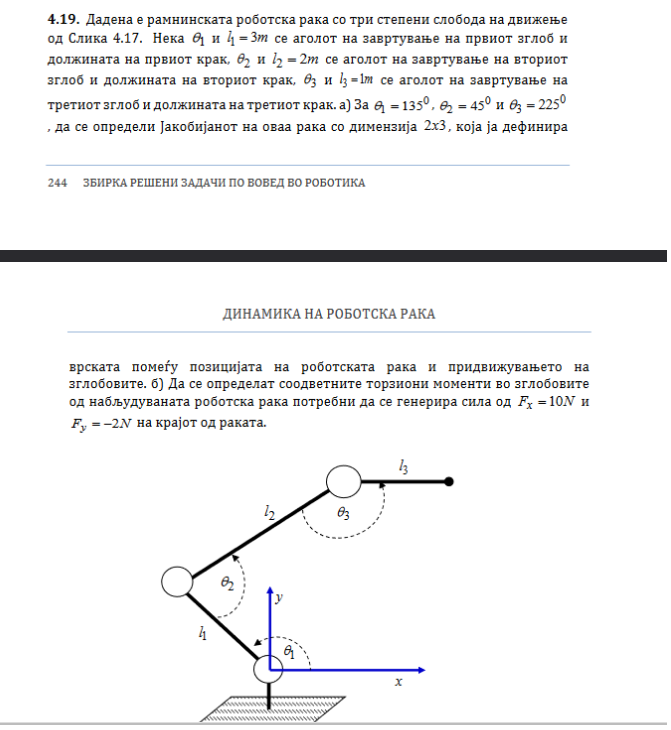

In [186]:
display.Image('images/4.19.png', width=700)

In [187]:
theta1, theta2, theta3, l1, l2, l3 = sp.symbols('theta1, theta2, theta3, l1, l2, l3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,0,l1,0)
robot.add_revolute_joint(theta2,0,l2,0)
robot.add_revolute_joint(theta3,0,l3,0)
robot.add_subs([(l1,1),(l2,1),(l3,1)])
robot.interact()

In [188]:
Jv= robot.linear_jacobian()
Jv

⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁ + θ₂) - l₃⋅sin(θ₁ + θ₂ + θ₃)  -l₂⋅sin(θ₁ + θ₂) - l₃⋅s
⎢                                                                             
⎢l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂) + l₃⋅cos(θ₁ + θ₂ + θ₃)   l₂⋅cos(θ₁ + θ₂) + l₃⋅co
⎢                                                                             
⎣                         0                                               0   

in(θ₁ + θ₂ + θ₃)  -l₃⋅sin(θ₁ + θ₂ + θ₃)⎤
                                       ⎥
s(θ₁ + θ₂ + θ₃)   l₃⋅cos(θ₁ + θ₂ + θ₃) ⎥
                                       ⎥
                            0          ⎦

In [189]:
Jv = Jv[:2,:]
Jv

⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁ + θ₂) - l₃⋅sin(θ₁ + θ₂ + θ₃)  -l₂⋅sin(θ₁ + θ₂) - l₃⋅s
⎢                                                                             
⎣l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂) + l₃⋅cos(θ₁ + θ₂ + θ₃)   l₂⋅cos(θ₁ + θ₂) + l₃⋅co

in(θ₁ + θ₂ + θ₃)  -l₃⋅sin(θ₁ + θ₂ + θ₃)⎤
                                       ⎥
s(θ₁ + θ₂ + θ₃)   l₃⋅cos(θ₁ + θ₂ + θ₃) ⎦

In [192]:
Jvv= Jv.subs(theta1, 3*sp.pi/4).subs(theta2, sp.pi/4).subs(theta3, 5*sp.pi/4).subs(l1, 3).subs(l2, 2).subs(l3, 1)
Jvv

⎡          -√2     -√2 ⎤
⎢ -2⋅√2    ────    ────⎥
⎢           2       2  ⎥
⎢                      ⎥
⎢              √2   √2 ⎥
⎢-2 - √2  -2 + ──   ── ⎥
⎣              2    2  ⎦

In [193]:
F= sp.Matrix([10, -2])
F

⎡10⎤
⎢  ⎥
⎣-2⎦

In [194]:
T=Jvv.T*F
T

⎡4 - 18⋅√2⎤
⎢         ⎥
⎢4 - 6⋅√2 ⎥
⎢         ⎥
⎣  -6⋅√2  ⎦

In [196]:
T.evalf()

⎡-21.4558441227157⎤
⎢                 ⎥
⎢-4.48528137423857⎥
⎢                 ⎥
⎣-8.48528137423857⎦

# 4.23

In [197]:
J_wrt_T6 = sp.Matrix([
    [20, 0, 0, 0, 0, 0],
    [-5, 0, 1, 0, 0, 0],
    [0, 20, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0],
    [-1, 0, 0, 0, 0, 1],
])
J_wrt_T6

⎡20  0   0  0  0  0⎤
⎢                  ⎥
⎢-5  0   1  0  0  0⎥
⎢                  ⎥
⎢0   20  0  0  0  0⎥
⎢                  ⎥
⎢0   1   0  0  1  0⎥
⎢                  ⎥
⎢0   0   0  1  0  0⎥
⎢                  ⎥
⎣-1  0   0  0  0  1⎦

In [198]:
F_wrt_T6 = sp.Matrix([0, 0, 5, 0, 0, 20])
F_wrt_T6

⎡0 ⎤
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢5 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎣20⎦

In [199]:
T=J_wrt_T6.T*F_wrt_T6
T

⎡-20⎤
⎢   ⎥
⎢100⎥
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎢ 0 ⎥
⎢   ⎥
⎣20 ⎦

# 4.24

In [200]:
theta1, theta2, theta3, l1, l2, l3 = sp.symbols('theta1, theta2, theta3, l1, l2, l3')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1,0,l1,0)
robot.add_revolute_joint(theta2,0,l2,0)
robot.add_subs([(l1,0.3),(l2,0.5),(l3,1)])
robot.interact()

In [201]:
Jv=robot.linear_jacobian()
Jv

⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁ + θ₂)  -l₂⋅sin(θ₁ + θ₂)⎤
⎢                                               ⎥
⎢l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)   l₂⋅cos(θ₁ + θ₂) ⎥
⎢                                               ⎥
⎣              0                       0        ⎦

In [202]:
Jv= Jv[0:2,:]
Jv

⎡-l₁⋅sin(θ₁) - l₂⋅sin(θ₁ + θ₂)  -l₂⋅sin(θ₁ + θ₂)⎤
⎢                                               ⎥
⎣l₁⋅cos(θ₁) + l₂⋅cos(θ₁ + θ₂)   l₂⋅cos(θ₁ + θ₂) ⎦

In [203]:
F = sp.Matrix([0, 500]) # ima samo zemjino zabrzuvanje, m=50 g=10 => m*g  po y oska
F

⎡ 0 ⎤
⎢   ⎥
⎣500⎦

In [205]:
Jv = Jv.subs(theta1, sp.pi/2).subs(theta2, -sp.pi/4).subs(l1, 0.3).subs(l2, 0.5)
Jv

⎡-0.25⋅√2 - 0.3  -0.25⋅√2⎤
⎢                        ⎥
⎣   0.25⋅√2      0.25⋅√2 ⎦

In [206]:
T= Jv.T*F
T

⎡125.0⋅√2⎤
⎢        ⎥
⎣125.0⋅√2⎦

In [207]:
T.evalf()

⎡176.776695296637⎤
⎢                ⎥
⎣176.776695296637⎦

# 4.28

In [16]:
theta1, theta2, d3 = mechanics.dynamicsymbols('theta1, theta2, d3')
l1, l2 = sp.symbols('l1, l2')
robot = rt.SerialLinkRobot()
robot.add_revolute_joint(theta1, 0, l1, sp.pi/2)
robot.add_revolute_joint(theta2, l2, 0, -sp.pi/2)
robot.add_prismatic_joint(0, d3, 0, 0)
robot.add_subs([(l1, 1), (l2, 1)])
robot.interact()

In [17]:
Jv = robot.linear_jacobian()
Jv

⎡-l₁⋅sin(θ₁) + l₂⋅cos(θ₁) + d₃⋅sin(θ₁)⋅sin(θ₂)  -d₃⋅cos(θ₁)⋅cos(θ₂)  -sin(θ₂)⋅
⎢                                                                             
⎢l₁⋅cos(θ₁) + l₂⋅sin(θ₁) - d₃⋅sin(θ₂)⋅cos(θ₁)   -d₃⋅sin(θ₁)⋅cos(θ₂)  -sin(θ₁)⋅
⎢                                                                             
⎣                      0                            -d₃⋅sin(θ₂)          cos(θ

cos(θ₁)⎤
       ⎥
sin(θ₂)⎥
       ⎥
₂)     ⎦

Ќе ја искористиме равенката $ T = \left({}^0 J\right)^\top \,\,{}^0 F$, но векторот на сили е даден во однос на друг коррдинатен систем, поточно ${}^3 F$. Затоа ќе го трансформираме соодветно множејќи го со ${}^0 R_3$. За да го пресметаме ${}^0 R_3$, ќе го искористиме DH моделот.

In [18]:
robot.get_dh_matrix()

⎡cos(θ₁)⋅cos(θ₂)  -sin(θ₁)  -sin(θ₂)⋅cos(θ₁)  l₁⋅cos(θ₁) + l₂⋅sin(θ₁) - d₃⋅sin
⎢                                                                             
⎢sin(θ₁)⋅cos(θ₂)  cos(θ₁)   -sin(θ₁)⋅sin(θ₂)  l₁⋅sin(θ₁) - l₂⋅cos(θ₁) - d₃⋅sin
⎢                                                                             
⎢    sin(θ₂)         0          cos(θ₂)                        d₃⋅cos(θ₂)     
⎢                                                                             
⎣       0            0             0                               1          

(θ₂)⋅cos(θ₁)⎤
            ⎥
(θ₁)⋅sin(θ₂)⎥
            ⎥
            ⎥
            ⎥
            ⎦

In [19]:
R_0_3 = robot.get_dh_matrix()[:3, :3]
R_0_3

⎡cos(θ₁)⋅cos(θ₂)  -sin(θ₁)  -sin(θ₂)⋅cos(θ₁)⎤
⎢                                           ⎥
⎢sin(θ₁)⋅cos(θ₂)  cos(θ₁)   -sin(θ₁)⋅sin(θ₂)⎥
⎢                                           ⎥
⎣    sin(θ₂)         0          cos(θ₂)     ⎦

In [20]:
F_wrt_3 = sp.Matrix([1, 0, 0])
F_wrt_3

⎡1⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [21]:
T = Jv.T * R_0_3 * F_wrt_3
T.simplify()
T

⎡l₂⋅cos(θ₂)⎤
⎢          ⎥
⎢   -d₃    ⎥
⎢          ⎥
⎣    0     ⎦

In [22]:
T_subed = T.subs(theta1, sp.pi/2).subs(theta2, sp.pi/6).subs(d3, 2*l1)
T_subed.simplify()
T_subed

⎡√3⋅l₂⎤
⎢─────⎥
⎢  2  ⎥
⎢     ⎥
⎢-2⋅l₁⎥
⎢     ⎥
⎣  0  ⎦